# Assignment 4. Deep Learning

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

*For questions 1 refer to @alino_9 on Telegram.*

### Description  
This homework consists of four questions, each aimed at one category in the world of Deep Learning.   
1. Getting familiarized with sentiment analysis (A subject also covered in the course project).
   
2. Multi-layer perceptron (MLP). 
   
3. Convolutional Neural Networks (CNN).
   
4. Variational Autoencoders (VAE).

### Information  
Complete the information box below.

### Full Name : Parishad Mokhber 
### Student Number : 98100537
__

### Note
The questions are not necessarily in order of difficulty. You are obligated to answer **3 out of 4** questions. The fourth question is optional and is considered as bonus.

## 1 Twitter Sentiment Analysis

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1.1 Load and Visualize Dataset

In [2]:
## Load dataset and print the length of train and test
train = pd.read_csv('train-tweets.csv')
test = pd.read_csv('test-tweets.csv')

print(train.shape, test.shape)

(31962, 3) (17197, 2)


In [3]:
# Show some samples of train set and test set
print(train.iloc[0, :])
print(train.iloc[100, :])

id                                                       1
label                                                    0
tweet     @user when a father is dysfunctional and is s...
Name: 0, dtype: object
id                                               101
label                                              0
tweet    there are some truly sick ppl out there.   
Name: 100, dtype: object


In [4]:
print(test.iloc[0, :])
print(test.iloc[100, :])

id                                                   31963
tweet    #studiolife #aislife #requires #passion #dedic...
Name: 0, dtype: object
id                                                   32063
tweet    worry not.   #daydream #sunlight #thunder #mis...
Name: 100, dtype: object


In [5]:
# Check if there is any null value in train and test
null_values_train = train.isnull().sum()
print("Null values in each column of train data:\n", null_values_train)

null_values_test = test.isnull().sum()
print("\nNull values in each column of test data:\n", null_values_test)

Null values in each column of train data:
 id       0
label    0
tweet    0
dtype: int64

Null values in each column of test data:
 id       0
tweet    0
dtype: int64


In [3]:
# Show 10 negative comments from train set
negative_comments = train[train['label'] == 1]
print(negative_comments.head(10)['tweet'])

13     @user #cnn calls #michigan middle school 'buil...
14     no comment!  in #australia   #opkillingbay #se...
17                                retweet if you agree! 
23       @user @user lumpy says i am a . prove it lumpy.
34     it's unbelievable that in the 21st century we'...
56               @user lets fight against  #love #peace 
68     ð©the white establishment can't have blk fol...
77     @user hey, white people: you can call people '...
82     how the #altright uses  &amp; insecurity to lu...
111    @user i'm not interested in a #linguistics tha...
Name: tweet, dtype: object


In [4]:
# Show 10 positive comments from train set
positive_comments = train[train['label'] == 0]
print(positive_comments.head(10)['tweet'])

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
5    [2/2] huge fan fare and big talking before the...
6     @user camping tomorrow @user @user @user @use...
7    the next school year is the year for exams.ð...
8    we won!!! love the land!!! #allin #cavs #champ...
9     @user @user welcome here !  i'm   it's so #gr...
Name: tweet, dtype: object


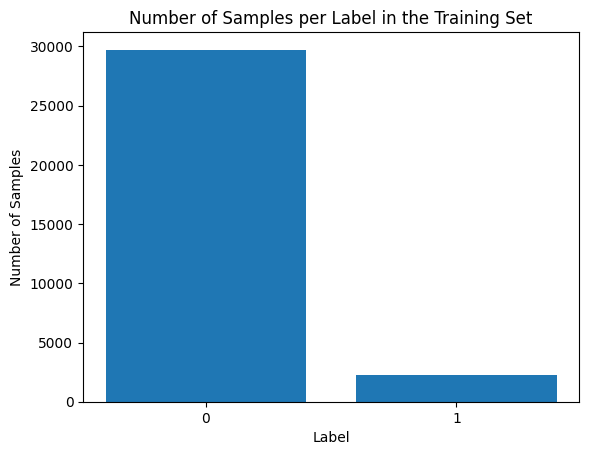

In [8]:
# Using barplot plot the number of samples for each label in train set
label_counts = train['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xticks([0, 1])
plt.title('Number of Samples per Label in the Training Set')
plt.xlabel('Label')
plt.ylabel('Number of Samples');

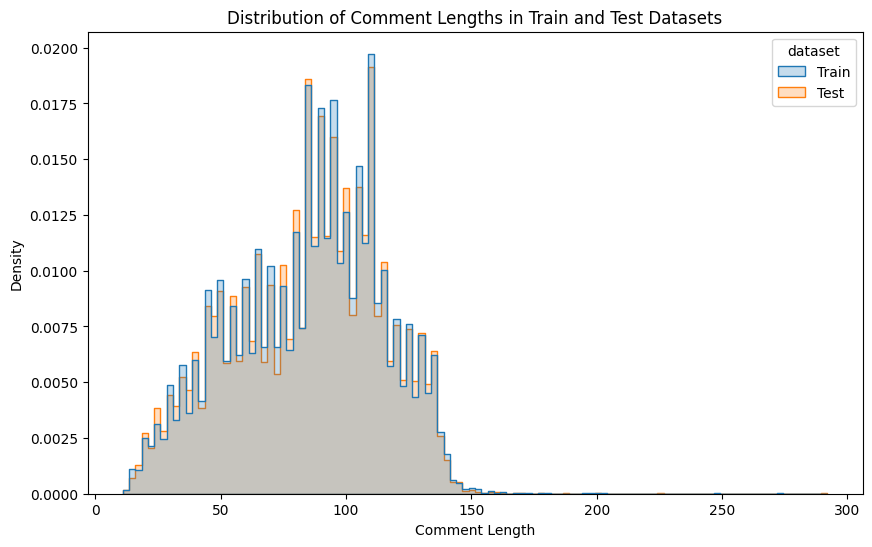

In [9]:
# Plot the distribution of tweets' length in the data (both train and test in one figure)
import seaborn as sns 

train['tweet_length'] = train['tweet'].apply(len)
test['tweet_length'] = test['tweet'].apply(len)

combined = pd.DataFrame({
    'length': pd.concat([train['tweet_length'], test['tweet_length']]),
    'dataset': ['Train']*len(train) + ['Test']*len(test)
})

plt.figure(figsize=(10, 6))
sns.histplot(data=combined, x='length', hue='dataset', element='step', stat='density', common_norm=False)

# Adding titles and labels
plt.title('Distribution of Comment Lengths in Train and Test Datasets')
plt.xlabel('Comment Length')
plt.ylabel('Density')

# Show the plot
plt.show()

In [10]:
# Add a column to represent the length of the tweet
train.head(5)

,id,label,tweet,tweet_length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [11]:
test.head(5)

,id,tweet,tweet_length
0,31963,#studiolife #aislife #requires #passion #dedic...,90
1,31964,@user #white #supremacists want everyone to s...,101
2,31965,safe ways to heal your #acne!! #altwaystohe...,71
3,31966,is the hp and the cursed child book up for res...,142
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",93


In [12]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

               tweet_length                                                 \
           max        count       mean        std   min   25%   50%    75%   
label                                                                        
0      31962.0      29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0   
1      31961.0       2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0   

              
         max  
label         
0      274.0  
1      152.0

In [8]:
# Find top 30 most frequency words in the train set
# hint: you can use CountVectorizer from sklearn

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# Fit and transform the data in the 'comment' column
X = vectorizer.fit_transform(train['tweet'])
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
word_freq = [{'word': word, 'freq': freq} for word, freq in zip(words, word_counts)]
top_30_words = sorted(word_freq, key=lambda x: x['freq'], reverse=True)[:30]

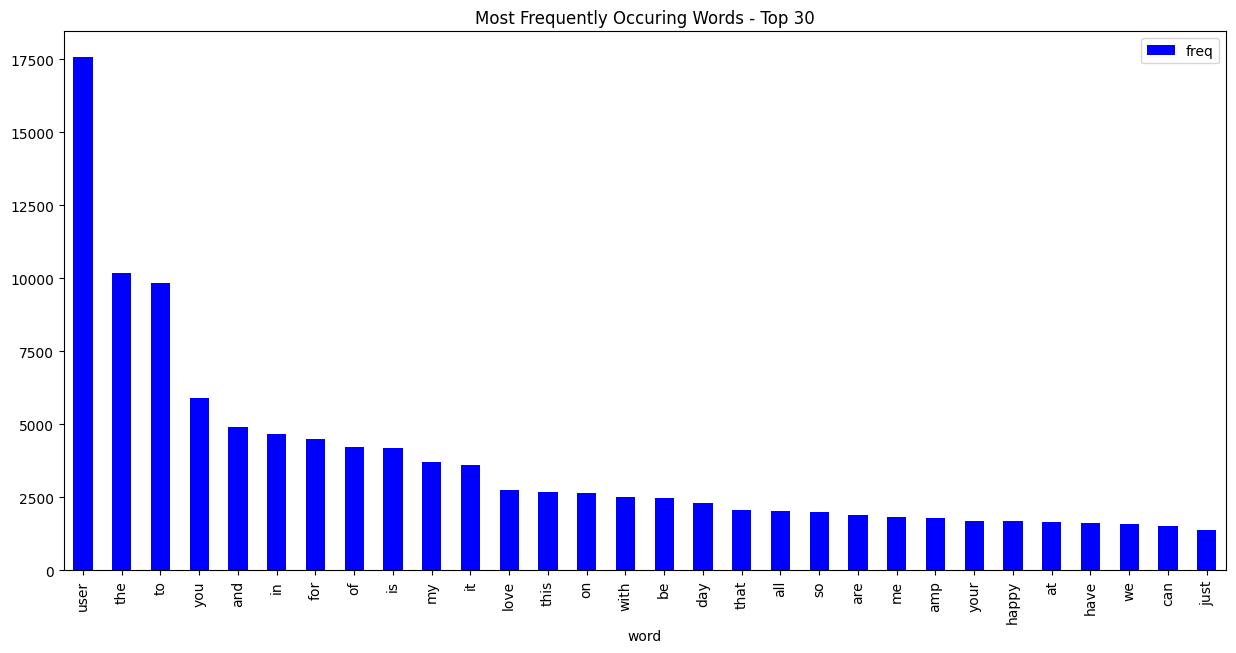

In [9]:
frequency = pd.DataFrame(top_30_words, columns=['word', 'freq'])
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30");

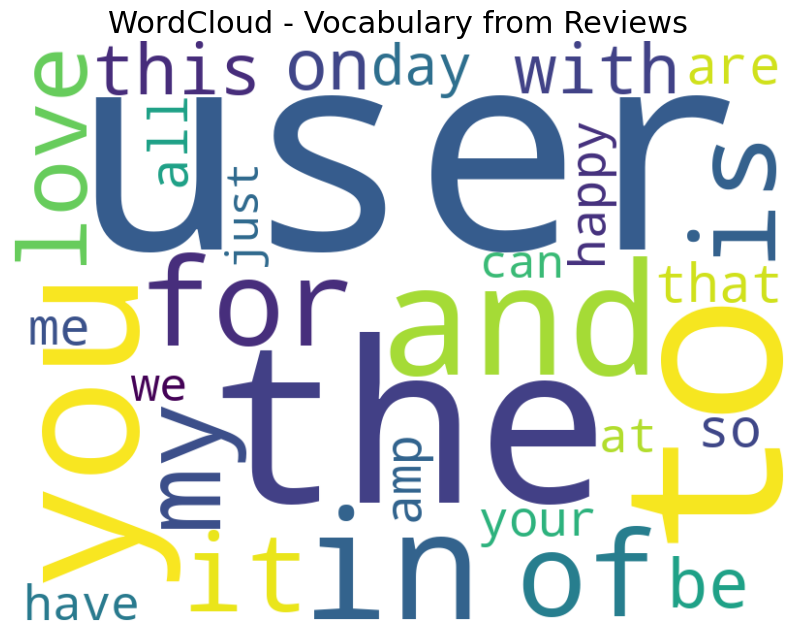

In [15]:
# plot the WordCloud for top 30 words
from wordcloud import WordCloud


word_freq = zip(words, word_counts)
top_30_words = sorted(word_freq, key=lambda x: x[1], reverse=True)[:30]
wordcloud_dict = {word: freq for word, freq in top_30_words}

wordcloud = WordCloud(width=800, height=600, background_color ='white').generate_from_frequencies(wordcloud_dict)
                   
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)
plt.axis('off')
plt.show()

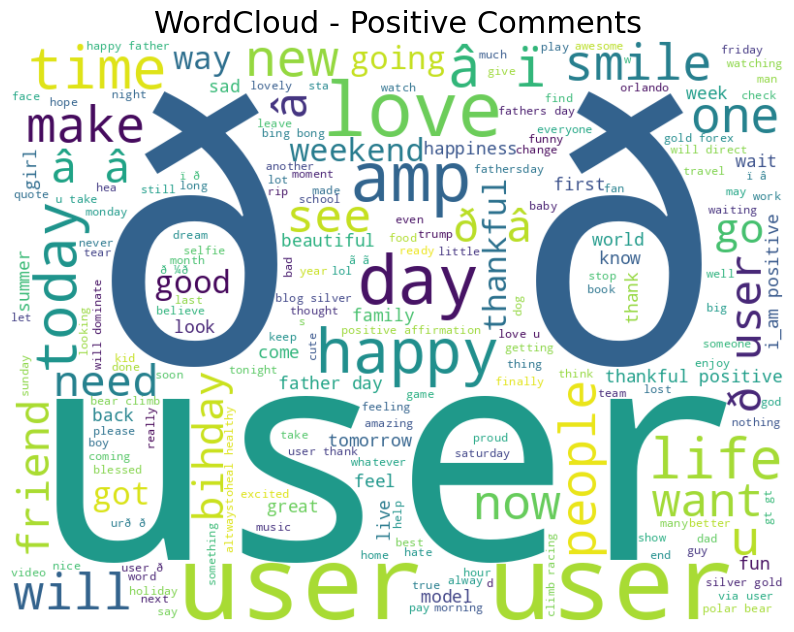

In [16]:
# plot the WordCloud for all words with positive label
positive_comments = train[train['label'] == 0]['tweet']

# Combine all positive comments into a single string
combined_comments = ' '.join(positive_comments)
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(combined_comments)
                        
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WordCloud - Positive Comments", fontsize=22)
plt.axis('off')
plt.show()

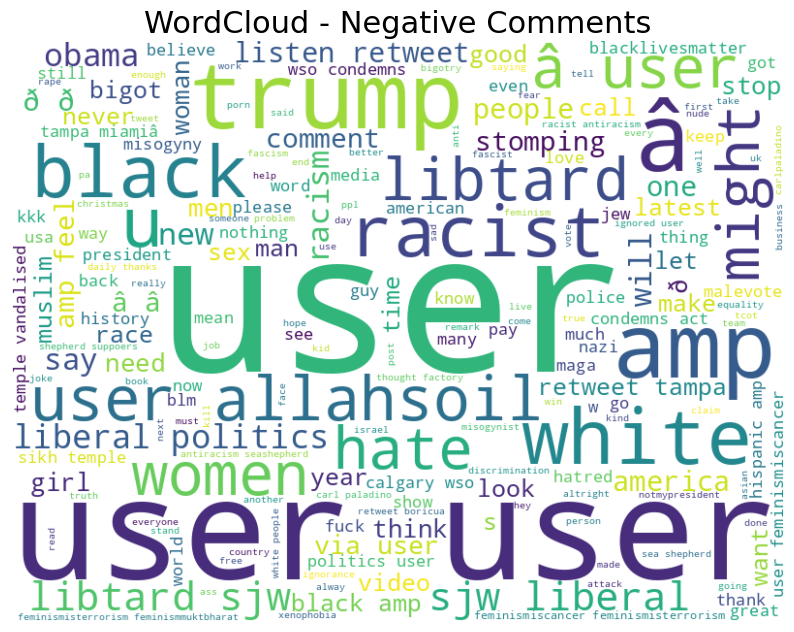

In [17]:
# plot the WordCloud for all words with negative label
negative_comments = train[train['label'] == 1]['tweet']

# Combine all positive comments into a single string
combined_comments = ' '.join(negative_comments)
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(combined_comments)
                        
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WordCloud - Negative Comments", fontsize=22)
plt.axis('off')
plt.show()

In [10]:
positive_comments = train[train['label'] == 0]['tweet']
negative_comments = train[train['label'] == 1]['tweet']

In [11]:
# Define a function to extract the hashtags
# The output must be a list of hashtags
import re

def hashtag_extract(text_list):
    hashtags = []
    hashtag_pattern = r"#\w+"
    
    for text in text_list:
        hashtags_in_text = re.findall(hashtag_pattern, text)
        hashtags.extend(hashtags_in_text)

    return hashtags

In [12]:
# extract hashtags from non racist/sexist (positive or neutral) tweets
HT_regular = hashtag_extract(positive_comments)

# extract hashtags from racist/sexist (negative) tweets
HT_negative = hashtag_extract(negative_comments)

In [13]:
print(HT_regular)

['#run', '#lyft', '#disapointed', '#getthanked', '#model', '#motivation', '#allshowandnogo', '#school', '#exams', '#hate', '#imagine', '#actorslife', '#revolutionschool', '#girl', '#allin', '#cavs', '#champions', '#cleveland', '#clevelandcavaliers', '#gr8', '#ireland', '#blog', '#silver', '#gold', '#forex', '#orlando', '#standwithorlando', '#pulseshooting', '#orlandoshooting', '#biggerproblems', '#selfish', '#heabreaking', '#values', '#love', '#80days', '#gettingfed', '#got7', '#junior', '#yugyoem', '#omg', '#thankful', '#positive', '#friday', '#cookies', '#euro2016', '#badday', '#coneofshame', '#cats', '#pissed', '#funny', '#laughs', '#wine', '#weekend', '#tgif', '#ff', '#gamedev', '#indiedev', '#indiegamedev', '#squad', '#upsideofflorida', '#shopalyssas', '#love', '#smiles', '#media', '#pressconference', '#antalya', '#turkey', '#throwback', '#ica16', '#rip', '#orlando', '#alohafriday', '#time', '#not', '#exist', '#positivevibes', '#hawaiian', '#goodnight', '#badmonday', '#taylorswift

In [21]:
print(HT_negative)

['#cnn', '#michigan', '#tcot', '#australia', '#opkillingbay', '#seashepherd', '#helpcovedolphins', '#thecove', '#helpcovedolphins', '#neverump', '#xenophobia', '#love', '#peace', '#race', '#identity', '#medâ', '#altright', '#whitesupremacy', '#linguistics', '#race', '#power', '#raciolinguistics', '#brexit', '#people', '#trump', '#republican', '#michelleobama', '#knicks', '#golfâ', '#jewishsupremacist', '#libtard', '#sjw', '#liberal', '#politics', '#trash', '#hate', '#â', '#stereotyping', '#prejudice', '#hope', '#hate', '#conflictâ', '#pols', '#bluelivesmatter', '#draintheswamp', '#ferguson', '#2016', '#antisemitism', '#hocoschools', '#columbiamd', '#hocomd', '#nazi', '#hatred', '#bigotry', '#libtard', '#sjw', '#liberal', '#politics', '#p2', '#p21', '#fyi', '#tcot', '#topoli', '#blacklivesmatter', '#ushistory', '#eugenics', '#biherism', '#bigotry', '#altright', '#potus', '#theresistance', '#crime', '#officerâ', '#black', '#retweet', '#tampa', '#miamiâ', '#allahsoil', '#praised', '#cleve

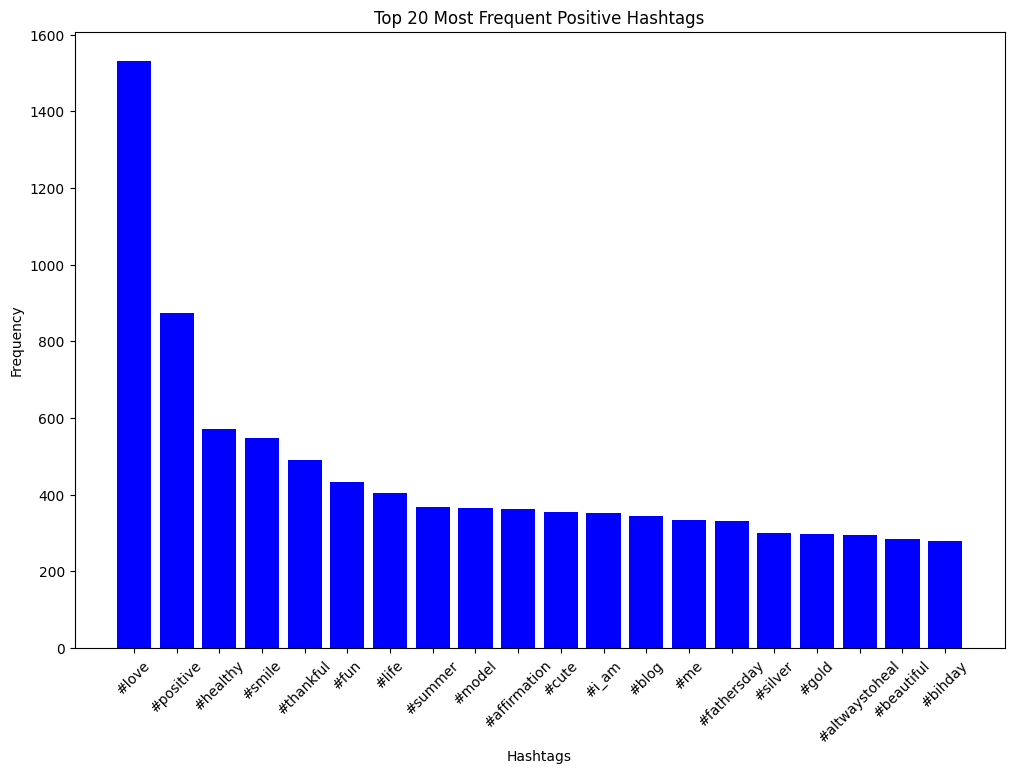

In [24]:
# Make a dataframe of regular hashtags and their count
# hint: you can use 'nltk' library
from collections import Counter

HT_regular_counts = Counter(HT_regular)
d = pd.DataFrame({'Hashtag': list(HT_regular_counts.keys()), 'Count': list(HT_regular_counts.values())})

top_20_regular = d.sort_values(by='Count', ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.bar(top_20_regular['Hashtag'], top_20_regular['Count'], color='blue')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Positive Hashtags')
plt.show()

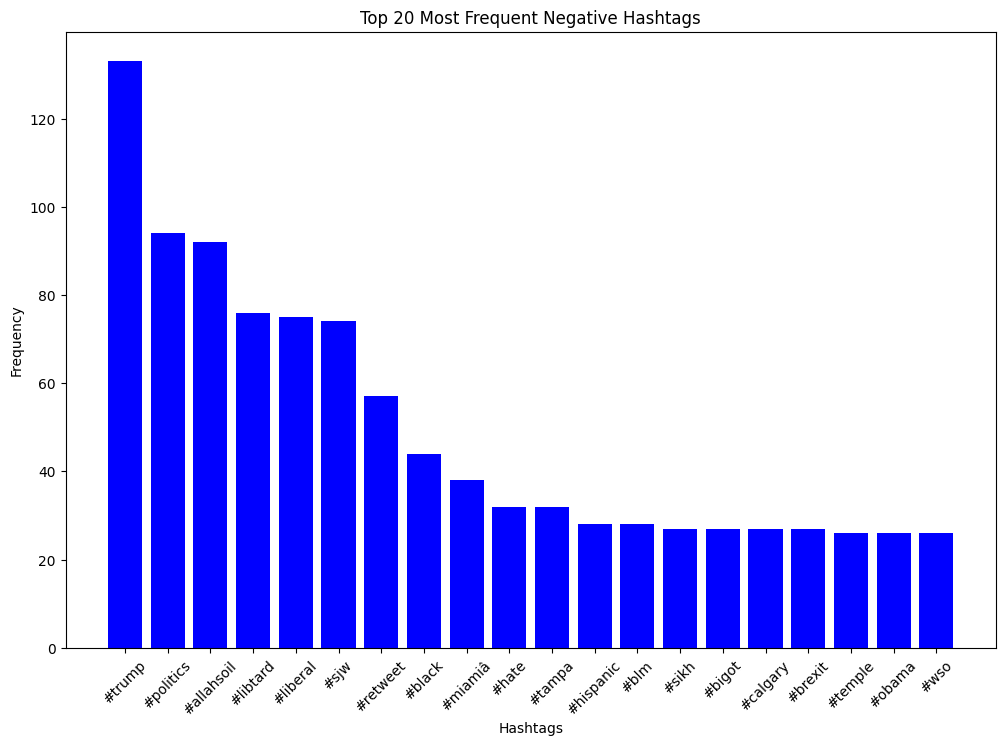

In [25]:
# Make a dataframe of negative hashtags and their count
HT_negative_counts = Counter(HT_negative)
d = pd.DataFrame({'Hashtag': list(HT_negative_counts.keys()), 'Count': list(HT_negative_counts.values())})

# Select top 20 most frequent hashtags and plot their frequencies
top_20_negative = d.sort_values(by='Count', ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.bar(top_20_negative['Hashtag'], top_20_negative['Count'], color='blue')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Negative Hashtags')
plt.show()

### 1.2 Pre-processing and Processing

In [ ]:
 # pip install gensim

In [ ]:
# tokenize the words present in the train set and then train a Word2Vec model (use seed=34)
# hint: you can use 'gensim' library
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

tokenized_tweet = [word_tokenize(comment.lower()) for comment in train['tweet']]
model_Word2Vec = Word2Vec(sentences=tokenized_tweet, vector_size=100, window=5, min_count=1, seed=34)

model_Word2Vec.save("word2vec.model")

In [28]:
# Using the model you trained, print most similar words to 'dinner'

similar_words = model_Word2Vec.wv.most_similar('dinner')

# Print the similar words and their similarity scores
for word, score in similar_words:
    print(f"{word}: {score}")

shopping: 0.9854001402854919
lunch: 0.9817649722099304
nyc: 0.9814279675483704
spring: 0.9791805148124695
coffee: 0.9788406491279602
planning: 0.9784130454063416
nick: 0.978289008140564
ð: 0.9780294299125671
breakfast: 0.9773012399673462
park: 0.9767677783966064


In [29]:
# Using the model you trained, print most similar words to 'cancer'
similar_words = model_Word2Vec.wv.most_similar('cancer')

# Print the similar words and their similarity scores
for word, score in similar_words:
    print(f"{word}: {score}")

lion: 0.9768292307853699
ã: 0.9763376116752625
smoking: 0.9756444692611694
gara2: 0.9755995869636536
aye: 0.9752488732337952
9/11: 0.9750039577484131
amazon: 0.9744858145713806
water: 0.9741711020469666
shaved: 0.97323077917099
bangkok: 0.9728997945785522


In [30]:
# Using the model you trained, print most similar words to 'apple'
similar_words = model_Word2Vec.wv.most_similar('apple')

# Print the similar words and their similarity scores
for word, score in similar_words:
    print(f"{word}: {score}")

sa: 0.9821776747703552
games: 0.980465292930603
south: 0.9785614609718323
international: 0.9772008657455444
festival: 0.9769343137741089
ì: 0.9755696058273315
michael: 0.9751425981521606
tea: 0.9748886227607727
lake: 0.9741433262825012
belgium: 0.9739664196968079


In [31]:
# Using the model you trained, print most similar words to 'hate'
similar_words = model_Word2Vec.wv.most_similar('hate')

# Print the similar words and their similarity scores
for word, score in similar_words:
    print(f"{word}: {score}")

cause: 0.9253957867622375
horrible: 0.9235594868659973
sick: 0.923498809337616
words: 0.9197114706039429
control: 0.9189192056655884
saying: 0.9132121801376343
clearly: 0.9120285511016846
feel: 0.9107893109321594
doubt: 0.9093284606933594
ppl: 0.9089629054069519


In [ ]:
# Removing unwanted patterns from the data
# In this part you should do any pre-processing that you think is helpful
# hint: use 'nltk' library
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

# In the end you must have two lists (train_corpus and test_corpus) of pre-processed tweets
# Feel free to add extra cells

train_corpus = []
test_corpus = []

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return ' '.join(tokens)

train_corpus = [preprocess_text(comment) for comment in train['tweet']]
test_corpus = [preprocess_text(comment) for comment in test['tweet']]

In [16]:
# Create BoW (bag of words) for train set
# you can use CountVectorizer with max_features=2500
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(train_corpus).toarray()
y = train['label']

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [17]:
# Create BoW (bag of words) for train set
# you can use CountVectorizer with max_features=2500
x_test = cv.transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [18]:
# splitting the training data into train and valid sets (use seed=42)
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [19]:
# standardize data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

### 1.3 Train Classification Models

In this part you must train these classifier models:

*   Random Forest
*   Logistic Regression
*   Decision Tree
*   SVM


For each model you must report all of the following metrics for each train, validation and test sets:

*   Accuracy
*   f1 Score
*   Confusion Matrix


**Hint:** You can use sklearn library. All of the accuracies should be more than 90%.

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7409
           1       0.61      0.51      0.55       582

    accuracy                           0.94      7991
   macro avg       0.79      0.74      0.76      7991
weighted avg       0.94      0.94      0.94      7991

Confusion Matrix:


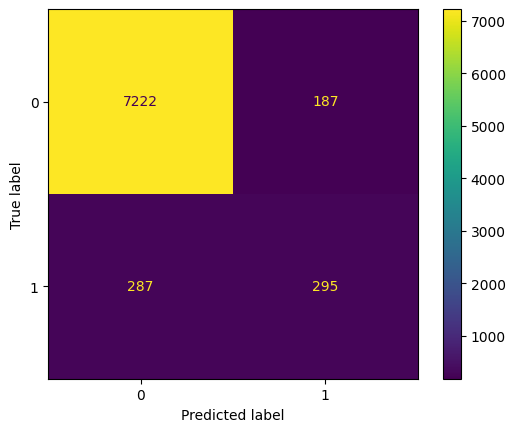

In [42]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_valid)

accuracy = accuracy_score(y_valid, y_pred)
classification_rep = classification_report(y_valid, y_pred)
confusion_mtx = confusion_matrix(y_valid, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
ConfusionMatrixDisplay(confusion_mtx).plot();

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7409
           1       0.58      0.55      0.57       582

    accuracy                           0.94      7991
   macro avg       0.77      0.76      0.77      7991
weighted avg       0.94      0.94      0.94      7991

Confusion Matrix:


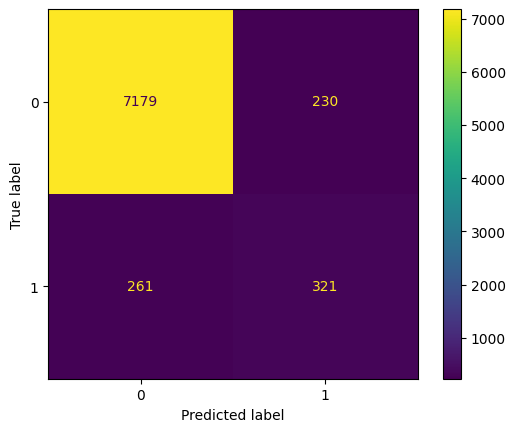

In [44]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=42, max_iter=500)
lr_classifier.fit(x_train, y_train)

y_pred = lr_classifier.predict(x_valid)

accuracy = accuracy_score(y_valid, y_pred)
classification_rep = classification_report(y_valid, y_pred)
confusion_mtx = confusion_matrix(y_valid, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
ConfusionMatrixDisplay(confusion_mtx).plot();

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7409
           1       0.44      0.54      0.48       582

    accuracy                           0.92      7991
   macro avg       0.70      0.74      0.72      7991
weighted avg       0.92      0.92      0.92      7991

Confusion Matrix:


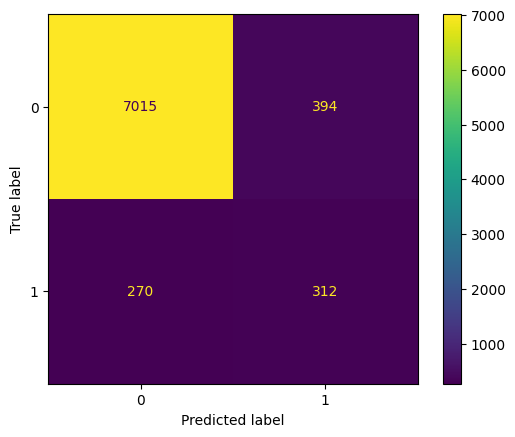

In [45]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(x_train, y_train)

y_pred = tree_classifier.predict(x_valid)

accuracy = accuracy_score(y_valid, y_pred)
classification_rep = classification_report(y_valid, y_pred)
confusion_mtx = confusion_matrix(y_valid, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
ConfusionMatrixDisplay(confusion_mtx).plot();

/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7446
           1       0.47      0.39      0.42       545

    accuracy                           0.93      7991
   macro avg       0.71      0.68      0.69      7991
weighted avg       0.92      0.93      0.92      7991

Confusion Matrix:


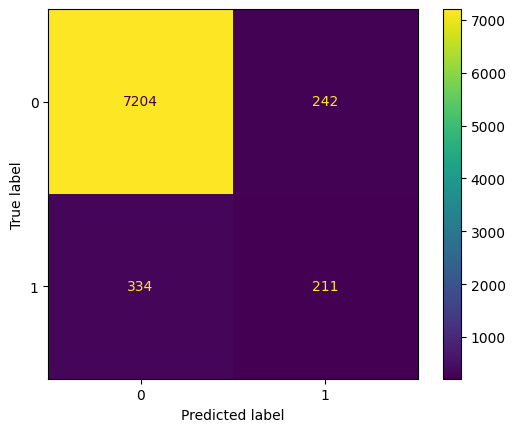

In [18]:
# SVM
from sklearn.svm import SVC
svm_classifier = SVC(random_state=42, kernel='rbf', max_iter=500)
svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_valid)

accuracy = accuracy_score(y_valid, y_pred)
classification_rep = classification_report(y_valid, y_pred)
confusion_mtx = confusion_matrix(y_valid, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
ConfusionMatrixDisplay(confusion_mtx).plot();

###  1.4 Unbalanced Datasets and Deep Learning

The approach to this part is entirely up to you. You can use libraries or methods that you prefer. Make sure to provide an explanation for each step.  
1. Discuss potential strategies for handling an unbalanced dataset. Choose one approach, apply it to train a classifier model, and then report the accuracy and confusion matrix.

One simple solution could be to use ***wieghts*** for the classes and giving more weight to the under-represented class, which is the negative ones here. Here we will use 'balanced' class_weight, which uses the values of targets to automatically adjust weights inversely proportional to class frequencies in the input data.

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      7417
           1       0.56      0.66      0.61       574

    accuracy                           0.94      7991
   macro avg       0.77      0.81      0.79      7991
weighted avg       0.94      0.94      0.94      7991

Confusion Matrix:


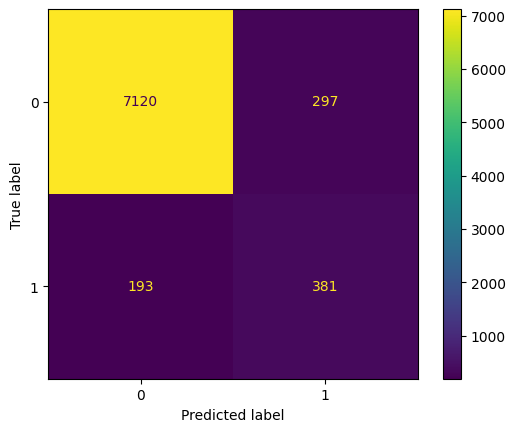

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

weighted_clf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1, max_depth=100, criterion='gini', min_samples_split=10)
weighted_clf.fit(x_train, y_train)

y_pred = weighted_clf.predict(x_valid)

accuracy = accuracy_score(y_valid, y_pred)
classification_rep = classification_report(y_valid, y_pred)
confusion_mtx = confusion_matrix(y_valid, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
ConfusionMatrixDisplay(confusion_mtx).plot();

As we can see, this simple method increased the f1-score and recell of the model in comparison with the previous methods leading to more negative tweets could be classified.

2. Using a deep-learning-based method to classify the tweets into two categories positive and negetive.

In [ ]:
# TODO